In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

# This will prompt you to upload kaggle.json from your PC
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanmayasarkar32","key":"ef4cb1f2dfe4dd69fc255aec376fd654"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list


ref                                                          title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                  Uber Data Analytics Dashboard                         17324552  2025-08-08 11:13:42.920000          30814        708  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets        Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000          17218        298  1.0              
navjotkaushal/coffee-sales-dataset                           Coffee Sales Dataset                                     38970  2025-08-19 09:37:30.057000           3525         45  0.8235294        
pratyushpuri/mu

In [ ]:
!mkdir -p /content/drive/MyDrive/ISL_Project/static_isl
!mkdir -p /content/drive/MyDrive/ISL_Project/dynamic_isl


Static ISL Dataset

In [ ]:
!kaggle datasets download -d atharvadumbre/indian-sign-language-islrtc-referred -p /content/drive/MyDrive/ISL_Project/static_isl
!unzip /content/drive/MyDrive/ISL_Project/static_isl/indian-sign-language-islrtc-referred.zip -d /content/drive/MyDrive/ISL_Project/static_isl


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/1.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/10.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/100.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/1000.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/101.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/102.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/103.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/104.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/105.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/106.jpg  
  inflating: /content/drive/MyDrive/ISL_Project/static_isl/original_images/V/107.

Dynamic ISL Dataset

In [ ]:
# Static dataset
!ls /content/drive/MyDrive/ISL_Project/static_isl



indian-sign-language-islrtc-referred.zip  original_images
'ISL DATA COMPILED AND CROPPED'
 isl-video-sentences-dataset-for-recognition.zip


**STATIC ISL MODEL**

Static Dataset preprocessing

In [ ]:
dataset_path = '/content/drive/MyDrive/ISL_Project/static_isl/original_images'


In [ ]:
!ls -l /content/drive/MyDrive/ISL_Project/static_isl/original_images | head -20


total 144
drwx------ 2 root root 4096 Sep  2 06:21 0
drwx------ 2 root root 4096 Sep  2 06:21 1
drwx------ 2 root root 4096 Sep  2 06:21 2
drwx------ 2 root root 4096 Sep  2 06:21 3
drwx------ 2 root root 4096 Sep  2 06:21 4
drwx------ 2 root root 4096 Sep  2 06:22 5
drwx------ 2 root root 4096 Sep  2 06:22 6
drwx------ 2 root root 4096 Sep  2 06:22 7
drwx------ 2 root root 4096 Sep  2 06:22 8
drwx------ 2 root root 4096 Sep  2 06:22 9
drwx------ 2 root root 4096 Sep  2 06:23 A
drwx------ 2 root root 4096 Sep  2 06:23 B
drwx------ 2 root root 4096 Sep  2 06:23 C
drwx------ 2 root root 4096 Sep  2 06:23 D
drwx------ 2 root root 4096 Sep  2 06:23 E
drwx------ 2 root root 4096 Sep  2 06:23 F
drwx------ 2 root root 4096 Sep  2 06:24 G
drwx------ 2 root root 4096 Sep  2 06:24 H
drwx------ 2 root root 4096 Sep  2 06:24 I


load images, resize, normalize, encode labels, and split into train/test

In [ ]:
# Import required libraries
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Path to your dataset
dataset_path = '/content/drive/MyDrive/ISL_Project/static_isl/original_images'

images = []
labels = []

# List class folders
classes = sorted(os.listdir(dataset_path))
print("Detected class folders:", classes)

# Load and preprocess images
for label in classes:
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        img_files = os.listdir(class_path)
        for img_name in img_files:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (48, 48))            # Resize images
                images.append(img)
                labels.append(label)

# Convert to numpy arrays and normalize
images = np.array(images) / 255.0
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_encoded = to_categorical(labels_encoded)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

print("Total images loaded:", len(images))
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Detected class folders: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Total images loaded: 36000
Training samples: 28800
Testing samples: 7200


Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Build CNN Model

In [ ]:
num_classes = y_train.shape[1]  # Number of ISL classes

model = Sequential([
    # First convolutional block
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)),
    MaxPooling2D((2,2)),

    # Second convolutional block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Third convolutional block
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,164 (1.37 MB)

 Trainable params: 360,164 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

Compile CNN Model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Traning CNN Model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 129s 140ms/step - accuracy: 0.2180 - loss: 2.8025 - val_accuracy: 0.9411 - val_loss: 0.2487
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 140s 139ms/step - accuracy: 0.8312 - loss: 0.5284 - val_accuracy: 0.9800 - val_loss: 0.0795
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 131s 146ms/step - accuracy: 0.9038 - loss: 0.2936 - val_accuracy: 0.9908 - val_loss: 0.0369
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 137s 141ms/step - accuracy: 0.9343 - loss: 0.2002 - val_accuracy: 0.9942 - val_loss: 0.0243
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 144s 144ms/step - accuracy: 0.9509 - loss: 0.1439 - val_accuracy: 0.9943 - val_loss: 0.0224
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 140s 141ms/step - accuracy: 0.9588 - loss: 0.1271 - val_accuracy: 0.9950 - val_loss: 0.0130
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 143s 142ms/step - accuracy: 0.9622 - loss: 0.1122 - val_accuracy: 0.9974 - val_loss: 0.0108
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 139s 140ms/step - accuracy: 0.9660 -

Check Training Progress

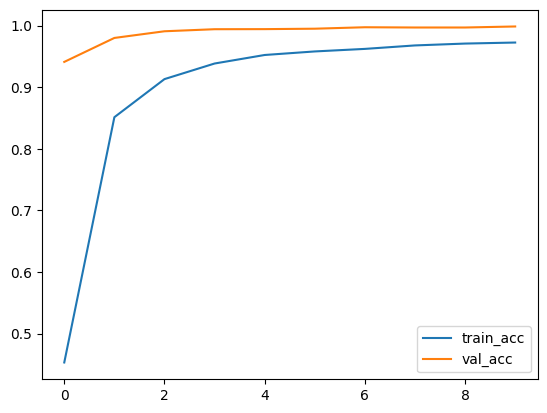

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Evaluate on Test Set

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9991 - loss: 0.0066
Test Accuracy: 0.9986110925674438


Save The Model

In [ ]:
model.save('/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model.h5')

Saving labelencoder

In [ ]:
import pickle

# Save LabelEncoder to file
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [ ]:
from google.colab import files
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

saving cnn model in different format

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model.h5")


In [ ]:
model.save("/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model.keras")

In [ ]:
import tensorflow as tf

# Correct path to your model in Google Drive
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model.keras",
    compile=False
)

# Save in TF 2.11 compatible HDF5 format
model.save("/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model_tf211.h5")



In [ ]:
from google.colab import files
# 3. Download the file directly to your PC
files.download("/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model_tf211.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model.keras", compile=False)


In [ ]:
model.save("/content/drive/MyDrive/ISL_Project/static_isl/isl_cnn_model_tf211_compat.h5", save_format="h5")
